In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm

In [4]:
def simulRepulsive(mu, M, N, eps, T):
    
    def V(theta):
        return(-sum(theta**2)/2-sum([1/sum((theta-mu_j)**2) for mu_j in mu]))
        
    def deltaV(theta): # gradient de V
        deltalogV = - theta + 2*sum([(theta-mu_j)/(sum((theta-mu_j)**2)**2) for mu_j in mu])
        return(deltalogV)
    
    chain = [] 
    q = np.zeros(2) # point de départ 
    chain.append(q)
    acc = 0 # calculer le taux d'acceptation de Metropolis Hastings
    
    for n in range(1,N): # nombre de point de la chaine
        
        p = np.random.multivariate_normal(np.zeros(2),M) # p (le moment) suit une loi N(0,M)
        q = chain[n-1]
        pstar = p
        qstar = q
        
        for t in range(T): # leapfrog integrator
            ptemp = pstar - eps/2*deltaV(qstar)
            qstar = qstar + eps*ptemp
            pstar = ptemp - eps/2*deltaV(qstar)
        
        H = - multivariate_normal(np.zeros(2), M).logpdf(p) - V(q) # calcul de H(p,q)
            
        Hstar = - multivariate_normal(np.zeros(2), M).logpdf(pstar) - V(qstar) # calcul de H(p*,q*)
            
        r = min(1,np.exp(H-Hstar)) 
        
        if (np.random.uniform(0,1)<r):
            chain.append(qstar)
            acc+=1
        else:
            chain.append(q)
        
    return {"chain" : np.array(chain), 'acc' : acc/N}

In [38]:
mu = np.random.multivariate_normal(np.zeros(2), np.eye(2), 7)
M = np.eye(2)
N = 100000
eps = 0.01
T = 15


out = simulRepulsive(mu, M, N, eps, T)
chain = out['chain']
acc = out['acc']

0.797

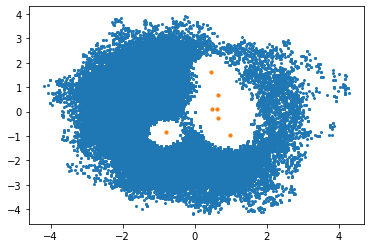

In [39]:
plt.scatter(chain[:,0], chain[:,1], s=4)
plt.scatter(mu[:,0], mu[:,1],s=10)
acc

In [40]:
from scipy.stats import gaussian_kde

x = chain[:,0]
y = chain[:,1]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

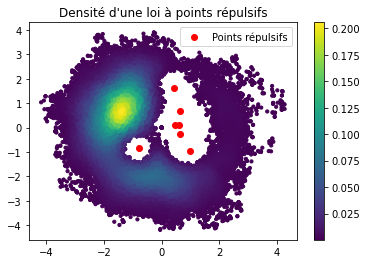

In [41]:
fig, ax = plt.subplots()
density = ax.scatter(x, y, c=z, s=10)
ax.scatter(mu[:,0], mu[:,1], c='red', label='Points répulsifs')
fig.colorbar(density)
plt.title('Densité d\'une loi à points répulsifs')
plt.legend()
plt.show();